Kimberly Adams 
DSC 530 September 2022

Download data files from github

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Download author's functions.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [31]:
# Import numpy and pandas packages
import numpy as np
import pandas as pd

# Import author's functions
import thinkstats2
import thinkplot

# Chapter 7
### Excercise 7-1

In [4]:
# Download dataset and dictionary.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [5]:
# Import data into three dataframes and then drop blank values in the live births dataframe.
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.

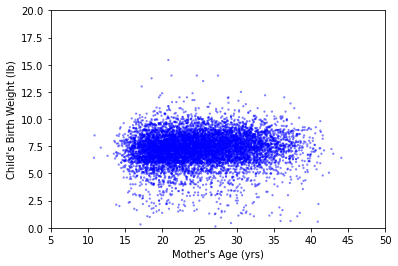

In [40]:
age, weight = live.agepreg, live.totalwgt_lb
thinkplot.Scatter(age, weight, alpha=0.5, s=5)
thinkplot.Config(xlabel="Mother's Age (yrs)",
                 ylabel="Child's Birth Weight (lb)",
                 axis=[5, 50, 0, 20],
                 legend=False)

Plot percentiles of birth weight versus mother’s age.

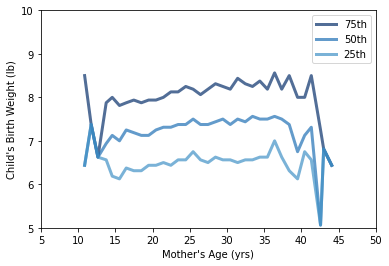

In [36]:
# Divide data into groups by mother's age
bins = np.arange(5, 50, 1)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

# Calculate CDF weights for each age grouping
mean_ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

# Plot 25th, 50th, and 75th percentile for each group
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_ages, weight_percentiles, label=label)
    
thinkplot.Config(xlabel="Mother's Age (yrs)",
                 ylabel="Child's Birth Weight (lb)",
                 axis=[5, 50, 5, 10],
                 legend=True)

Compute Pearson’s and Spearman’s correlations.

In [32]:
# Import author's functions 

# Calculates covariance of 2 variables
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    # If mean is not predifined, then set to the mean of inputted numbers
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    # Calculate covariance
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


# Calculates Pearson's correlation of 2 varaibles
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    # Calculate mean and variance of each variable
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    # Calculate correlation
    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr


# Calculates Spearman's correlation of 2 variables
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)


print("Pearson's correlation = ", Corr(age, weight))
print("Spearman's correlation = ", SpearmanCorr(age, weight))

Pearson's correlation =  0.06883397035410907
Spearman's correlation =  0.09461004109658226


How would you characterize the relationship between these variables?

*There is a VERY slight positive correlation between the two variables such that as a mother ages, she might give birth to slightly heavier infants, but the correlation is so close to zero that it is difficult to draw conclusions without further analysis.*
  
*The lack of clarity between the variables is also supported by the scatterplot which lacks a clear trend and if anything is a mostly horizontal cloud of points.*

*There is also significant variation in point values, particularly at the edges of the mother's age range.  This suggests either numerous outliers at these edges, lack of data comparatively to the middle range, or a non-linear relationship that is obscured by the cloud in the scatterplot.*

# Chapter 8
### Excercise 8-1

In this chapter we used $\bar{x}$ and median to estimate μ, and found that $\bar{x}$ yields lower MSE. Also, we used S2 and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ is unbiased. 

Run similar experiments to see if $\bar{x}$ and median are biased estimates of μ.

In [47]:
import random

# Import author's functions for mean

# Calculate Root Mean Squared Error
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    # Calculate error
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)


# Estimates population mean using a set number of sample repetition and sampling size
def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

In [43]:
Estimate1(n=7, iters=1000)

Experiment 1
rmse xbar 0.39154087344594585
rmse median 0.46878465272421993


In [45]:
Estimate1(n=7, iters=1000)

Experiment 1
rmse xbar 0.3829023459647154
rmse median 0.4514050838705344


In [46]:
Estimate1(n=7, iters=1000)

Experiment 1
rmse xbar 0.39098922474719655
rmse median 0.4586627716466155


$\bar{x}$ *consistently has a lower root means squared error value than the median suggesting that it is better at estimating the mean.  However, the median can be helpful in calculating the mean if the dataset contains outliers or other "non-conforming" data.  Both values in our experiments are fairly close to each other though so it is difficult to determine which works best without further information.* 

Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [51]:
# Import author's functions for variance

# Calculate Mean Error
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


# Estimates population variance using a set number of sample repetition and sampling size
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs) # s2
        unbiased = np.var(xs, ddof=1) #s2 n-1
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('S2 (biased) mean error', MeanError(estimates1, sigma**2))
    print('S2 n-1 (unbiased) mean error', MeanError(estimates2, sigma**2))

In [52]:
Estimate2(n=7, iters=1000)

S2 (biased) mean error -0.1567263594193195
S2 n-1 (unbiased) mean error -0.016180752655872724


In [53]:
Estimate2(n=7, iters=1000)

S2 (biased) mean error -0.13835437677601123
S2 n-1 (unbiased) mean error 0.005253227094653567


In [54]:
Estimate2(n=7, iters=1000)

S2 (biased) mean error -0.13173740977533213
S2 n-1 (unbiased) mean error 0.012973021928779157


$S_{n-1}^2$ *has almost zero error consistently indicating very  little error while $S^2$ is consistently much larger and negative indicating a lot more error because it is too low.*

### Excercise 8-2

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Standard Error = 87.78682099091728
90% Confidence Interval = (1.2471652081352873, 3.744289049427931)


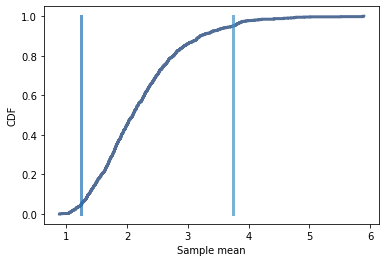

In [89]:
# Use author's functions with some modifications

# Estimates L (an estimate of lambda)
def Estimate3(n=7, iters=1000):
    lam = 2

    EstL = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        EstL.append(L)
        
    # Plot a distribution of L    
    cdf = thinkstats2.Cdf(EstL)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    
    # Calculate Standard Deviation
    stderr = RMSE(EstL, 90)
    print('Standard Error =', stderr)
    
    # Calculate 90% Confidence Interval
    confint = cdf.Percentile(5), cdf.Percentile(95)
    print('90% Confidence Interval =', confint)
    
    # Add Confidence Interval markers to graph
    thinkplot.Plot([confint[0], confint[0]], [0, 1])
    thinkplot.Plot([confint[1], confint[1]], [0, 1])
    
    
Estimate3(n=10, iters=1000)

Repeat the experiment with a few different values of n.

Standard Error = 87.94509433212845
90% Confidence Interval = (1.605676274717198, 2.571601133945257)


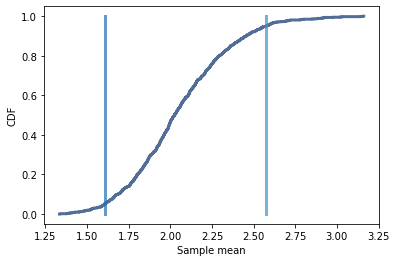

In [77]:
Estimate3(n=50, iters=1000)

Standard Error = 87.99669805890483
90% Confidence Interval = (1.8104056453967006, 2.2164013478164097)


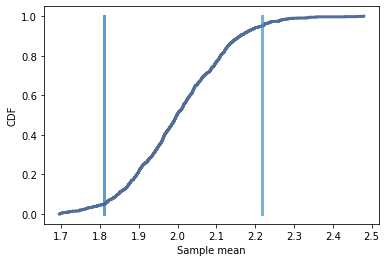

In [84]:
Estimate3(n=250, iters=1000)

Standard Error = 87.99795183347636
90% Confidence Interval = (1.9040280118658828, 2.109109604710798)


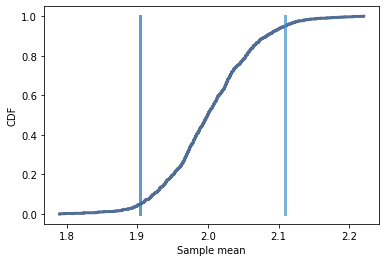

In [78]:
Estimate3(n=1000, iters=1000)

Make a plot of standard error versus n.

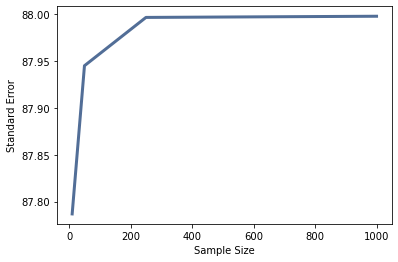

In [90]:
nValues = [10, 50, 250, 1000]
StdErrorValues = [87.78682099091728,87.94509433212845,87.99669805890483,87.99795183347636]

thinkplot.Plot(nValues, StdErrorValues)
thinkplot.Config(xlabel="Sample Size",
                 ylabel="Standard Error",
                 legend=False)

*As sample size increases, the Standard Error maxes out and the Confidence Intervals shrink slightly with added samples.  In my different sample sizes, the Standard Error seems to max out by n=250.*